In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from plots import *
from util import *

In [2]:
# Defining dictionary for plot styles
d_sample = dict(color='#00B0F0',linestyle=':',label=get_display('ללא פקידות חוזרות'),alpha=0.8)
d_4_8_4 = dict(color='#0070C0',linestyle='dashed',label=get_display('פקידות חוזרות (שיטת 4-8-4)'))
d_real = dict(color='r',linestyle='--', label=get_display('במציאות'))

d_sample_m = dict(color='#00B0F0',linestyle=':',marker='.',label=get_display('ללא פקידות חוזרות'),alpha=0.8)
d_4_8_4_m = dict(color='#0070C0',linestyle='dashed',marker='.',label=get_display('פקידות חוזרות (שיטת 4-8-4)'))
d_real_m = dict(color='r',linestyle='--',marker='.', label=get_display('במציאות'))




### Mathematical explanation of the model

$\hat{p}_b \sim N(p_b,\frac{SD}{\sqrt{N}})$
When:
$SD = \sqrt{p_b(1-p_b)}$ 
The parameters of the model:
$N=80$  (sample size)

The formula describes the estimated distribution of the proportion of group B in the sample.

$p_b=0.15$ (rate of group B in the population)


In [3]:
# Setting up parameters for the simulation
n = 80  # Sample size
group_b = 0.15  # Proportion of group B in the population
y_base_a = 40  # Base value for group A
y_base_b = 80  # Base value for group B

# Defining time range for the simulation
times = pd.period_range(start='01-2012', end='12-2023', freq='M').to_timestamp()
t = len(times)

# We start plotting from the 25th month
x =times[24:] 
# Real values (constant over time)
y_real = np.array([y_base_a * (1 - group_b) + y_base_b * group_b] *t)[24:]

In [4]:
# Generating sample data
np.random.seed(0)  # For reproducibility
b_sample, y_sample = rand_group_b(group_b, y_base_a, y_base_b, t)
y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()  # Applying 4-8-4 method
b_mean = b_sample.mean()*100


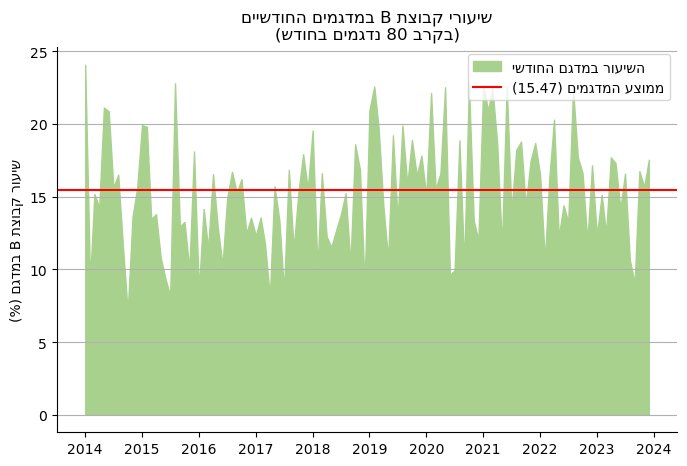

In [5]:

# Plotting proportion of group B in monthly samples

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
label = str('({:.2f})'.format(b_mean)) + get_display('ממוצע המדגמים ') 
ax.fill_between(x, b_sample[24:]*100,color='#A9D18E',label=get_display('השיעור במדגם החודשי'))
ax.axhline(b_mean,color="r",label=label)

ax.grid(axis = 'y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
title1 = get_display('שיעורי קבוצת B במדגמים החודשיים')
title2 = get_display('(בקרב 80 נדגמים בחודש)')
ax.set_ylabel(get_display('שיעור קבוצת B במדגם (%)'))
ax.set_title(title1 + '\n' +title2)
plt.legend()
plt.show()

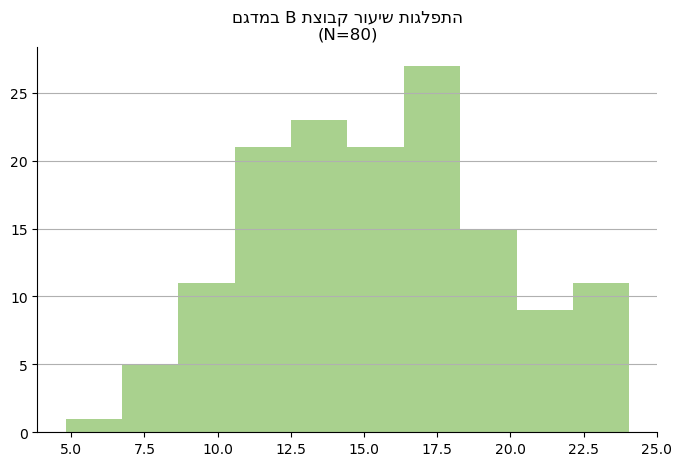

In [6]:

# Plotting histogram of group B proportion in samples
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.hist(b_sample*100,color ='#A9D18E')
ax.grid(axis = 'y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

title1 = get_display('התפלגות שיעור קבוצת B במדגם')
title2 = get_display('(N=80)')
ax.set_title(title1 + '\n' +title2)
plt.show()

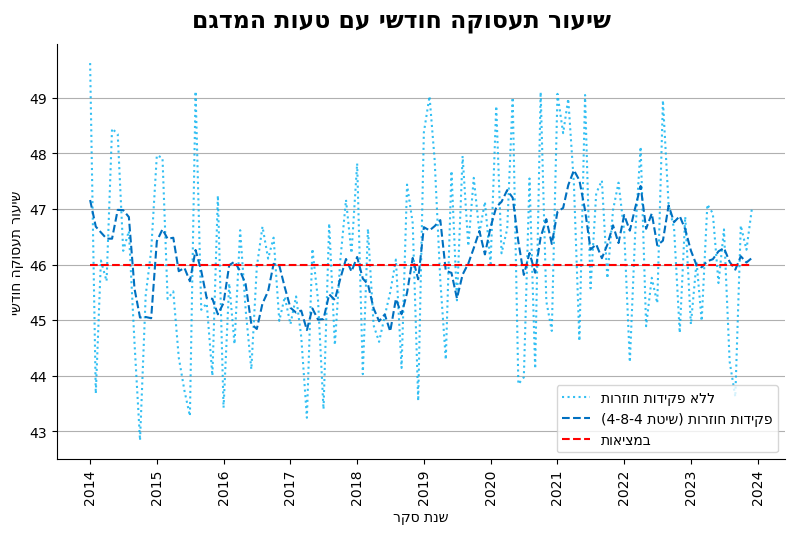

In [7]:
# Plotting monthly employment rate with sampling error and 4-8-4 method
fig, ax = plt.subplots(1,1,figsize=(8,5))

plot_sample_484(ax,x,
                y_sample[24:],y_484[24:], y_real,
                d_sample,d_4_8_4, d_real)

plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)      
ax.set_xlabel(get_display('שנת סקר'))
ax.set_ylabel(get_display('שיעור תעסוקה חודשי'))
fig.suptitle(get_display('שיעור תעסוקה חודשי עם טעות המדגם'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

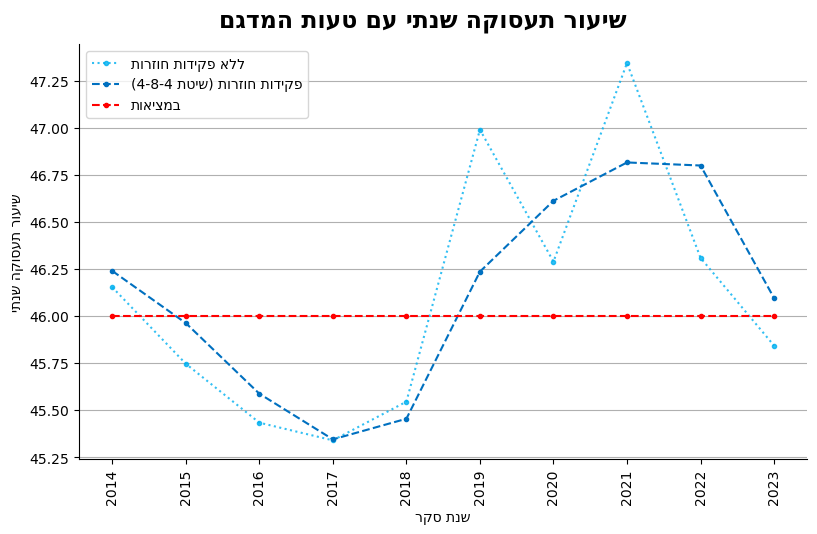

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
plot_sample_484_yearly(ax,x,
                y_sample[24:],y_484[24:], y_real,
                d_sample_m,d_4_8_4_m, d_real_m)

plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)    
  
ax.set_xlabel(get_display('שנת סקר'))
ax.set_ylabel(get_display('שיעור תעסוקה שנתי'))
fig.suptitle(get_display('שיעור תעסוקה שנתי עם טעות המדגם'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

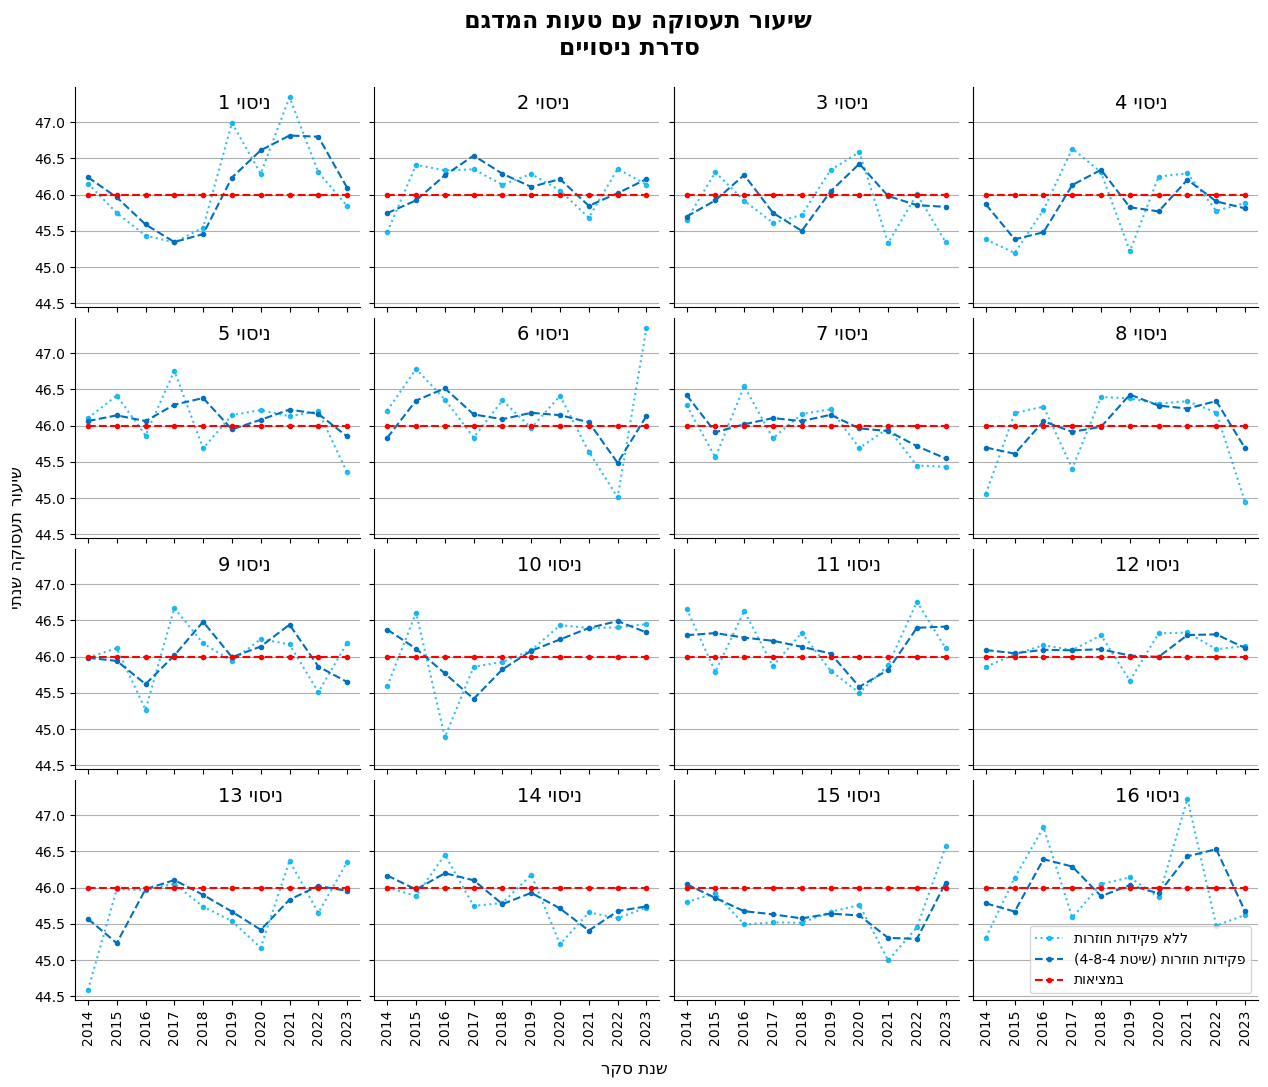

In [9]:
# Multiple samples of yearly employment rate with sampling error and 4-8-4 method
ncols = 4
nrows = 4

fig, axs = plt.subplots(nrows,ncols,figsize=(13,11), sharex='all', sharey='all')

k=0
for i in range(nrows):
    for j in range(ncols):
        np.random.seed(k)
        
        _,y_sample =  rand_group_b(group_b, y_base_a,y_base_b, t)

        y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()[24:]
        ax = axs[i, j]
                
        plot_sample_484_yearly(ax,x, y_sample[24:],y_484, y_real,
                d_sample_m,d_4_8_4_m, d_real_m)
        
        k+= 1
        ax.text(0.5, 0.9,   str(k) +get_display(' ניסוי '), fontsize=14 ,transform=ax.transAxes)         

plt.subplots_adjust(left=0.07, right=0.98, bottom=0.08, top=0.91, hspace=0.05, wspace=0.05)    
  
fig.supxlabel(get_display('שנת סקר'))
fig.supylabel(get_display('שיעור תעסוקה שנתי'))
fig.suptitle(get_display('שיעור תעסוקה עם טעות המדגם \n סדרת ניסויים'),fontsize=17,fontweight ="bold")
plt.legend(loc='best')

plt.show()

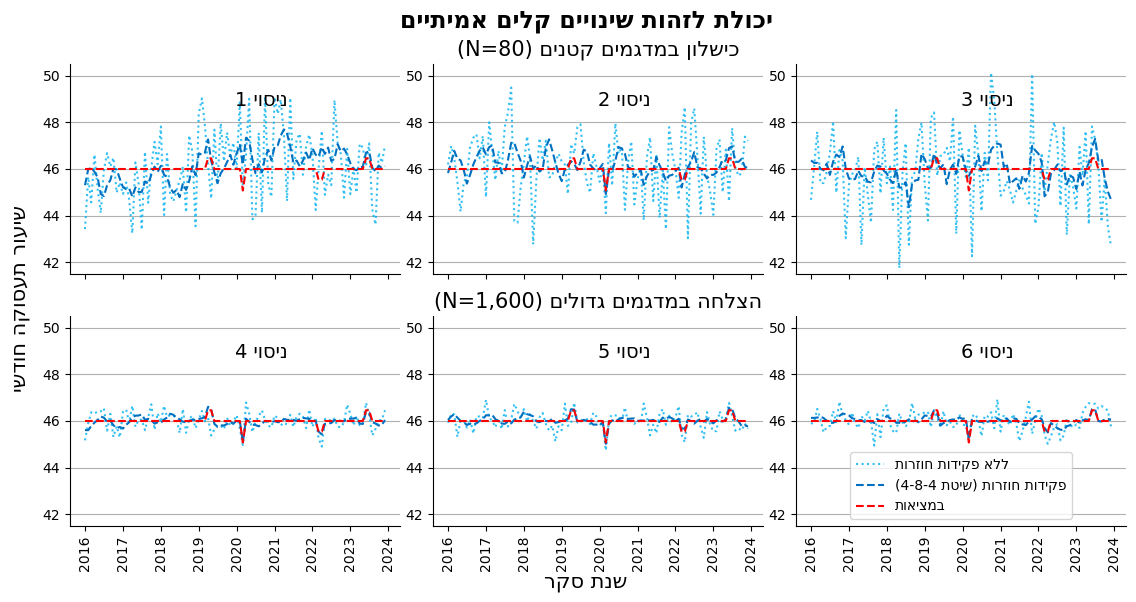

In [10]:

# Simulating shocks to the employment rate and comparing small vs large sample sizes
ncols = 3
nrows = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 6), sharex='all')
            
shock = np.ones(t-48)
shock[39:41] = 1.01  # 1% increase
shock[50] = 0.98  # 2% decrease
shock[74:76] = 0.99  # 1% decrease
shock[89:91] = 1.01  # 1% increase

k=0
for i in range(nrows):
    for j in range(ncols):
        ax = axs[i, j]
        if i == 0:
            n = 80  # Small sample size
            if j == 1:
                ax.set_title(get_display("כישלון במדגמים קטנים (N=80)"),fontsize=15)
        else:
            n = 1500  # Large sample size
            if  j==1:
                ax.set_title(get_display("הצלחה במדגמים גדולים (N=1,600)"),fontsize=15)
        np.random.seed(k)
        _,y_sample =  rand_group_b(group_b, y_base_a,y_base_b,  t,n)
        y_484 = mean_4_8_4(pd.Series(y_sample)).to_numpy()[48:] 
        
        plot_sample_484(ax,x[24:],
                y_sample[48:]*shock,y_484*shock, y_real[24:]*shock,
                d_sample,d_4_8_4, d_real)
        
        k+= 1
        ax.text(0.5, 0.8,  str(k) +get_display(' ניסוי '), fontsize=14 ,transform=ax.transAxes)
        ax.set_ylim(41.5,50.5)



plt.legend(loc='lower center')
plt.subplots_adjust(left=0.07, right=0.95, bottom=0.12, top=0.89, hspace=0.2, wspace=0.1)    
fig.supxlabel(get_display('שנת סקר'),fontsize=15)
fig.supylabel(get_display('שיעור תעסוקה חודשי'),fontsize=15)
fig.suptitle(get_display('יכולת לזהות שינויים קלים אמיתיים'),fontsize=17,fontweight ="bold")
plt.show()